In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')

In [3]:
data.head(4)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6


In [4]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
import sklearn

In [7]:
from sklearn.metrics import accuracy_score

In [8]:
from sklearn.metrics import confusion_matrix, classification_report

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
from scipy.stats import zscore

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
data.shape

(1599, 12)

In [13]:
#there are 1599 rows and 12 columns

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


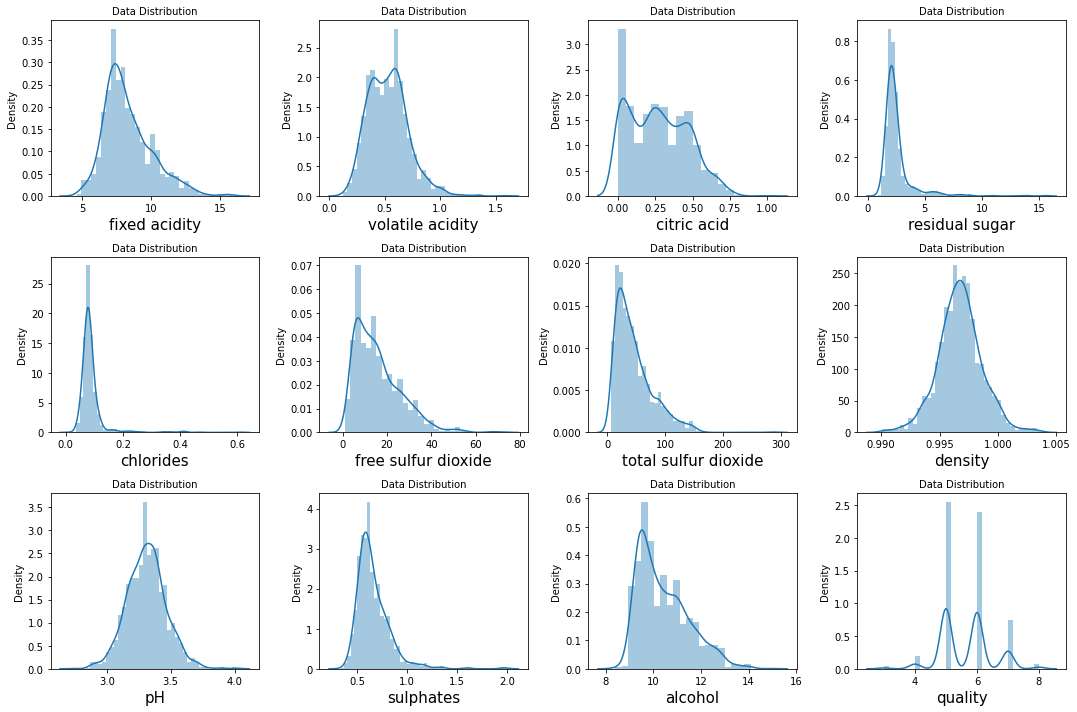

In [15]:
#Checking skewness in the data

plt.figure(figsize = [15,10])
plotnumber = 1

for column in data:
    if plotnumber<=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 15)
        plt.title("Data Distribution", fontsize = 10)
    plotnumber += 1
plt.tight_layout()

In [16]:
#With the above distribution it seems like there is lot of skewness in the data which we will remove with the help of quantile method

In [17]:
#Skewness found in columns
#1 . fixed acidity
#2 . Volatile acidity
#3 . Citric acidity
#4 . Residual Sugar
#5 . Chlorides
#6 . free sulphur dioxide
#7 . total sulphur dioxide
#8 . ph
#9 . Sulphates
#10. Alcohol

In [18]:
q = data['fixed acidity'].quantile(0.98)
new_data = data[data['fixed acidity']<q]

q = new_data['volatile acidity'].quantile(0.99)
new_data = new_data[new_data['volatile acidity']<q]


q = new_data['citric acid'].quantile(0.98)
new_data = new_data[new_data['citric acid']<q]


q = new_data['residual sugar'].quantile(0.95)
new_data = new_data[new_data['residual sugar']<q]


q = new_data['chlorides'].quantile(0.94)
new_data = new_data[new_data['chlorides']<q]


q = new_data['free sulfur dioxide'].quantile(0.95)
new_data = new_data[new_data['free sulfur dioxide']<q]


q = new_data['total sulfur dioxide'].quantile(0.96)
new_data = new_data[new_data['total sulfur dioxide']<q]


q = new_data['pH'].quantile(0.99)
new_data = new_data[new_data['pH']<q]


q = new_data['sulphates'].quantile(0.95)
new_data = new_data[new_data['sulphates']<q]


q = new_data['alcohol'].quantile(0.98)
new_data = new_data[new_data['alcohol']<q]

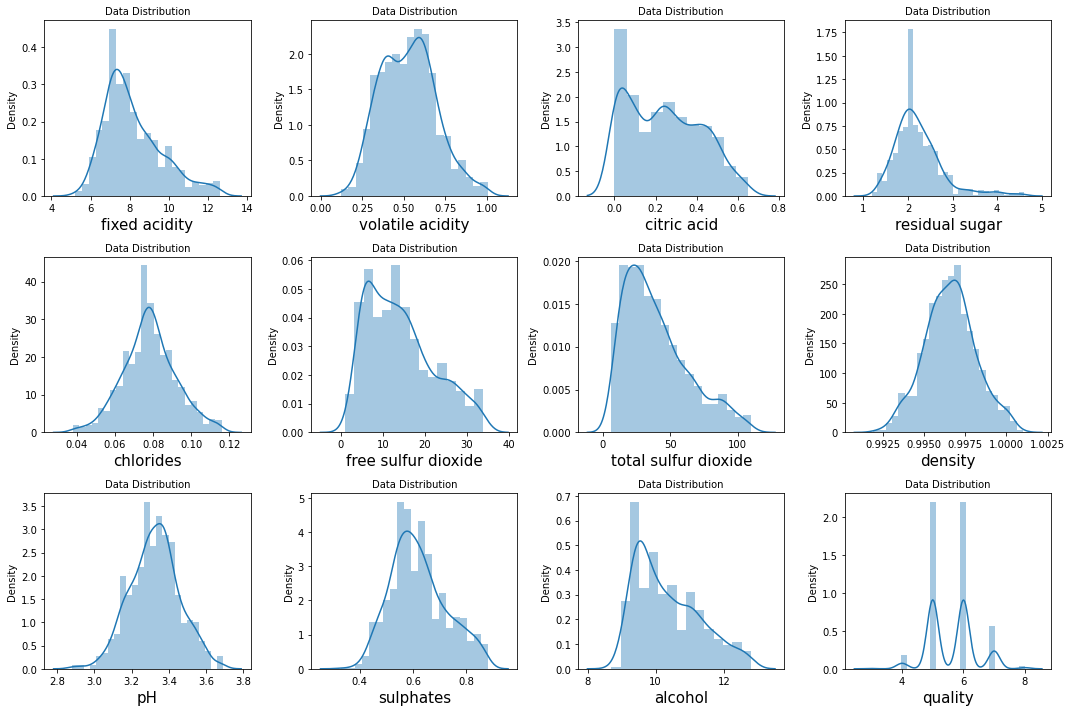

In [19]:
#Plotting again to see the data distribution


plt.figure(figsize = [15,10])
plotnumber = 1

for column in new_data:
    if plotnumber<=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(new_data[column])
        plt.xlabel(column, fontsize = 15)
        plt.title("Data Distribution", fontsize = 10)
    plotnumber += 1
plt.tight_layout()

In [20]:
#Since the skewness is still there in residual sugar.

q = new_data['residual sugar'].quantile(0.98)
new_data = new_data[new_data['residual sugar']<q]

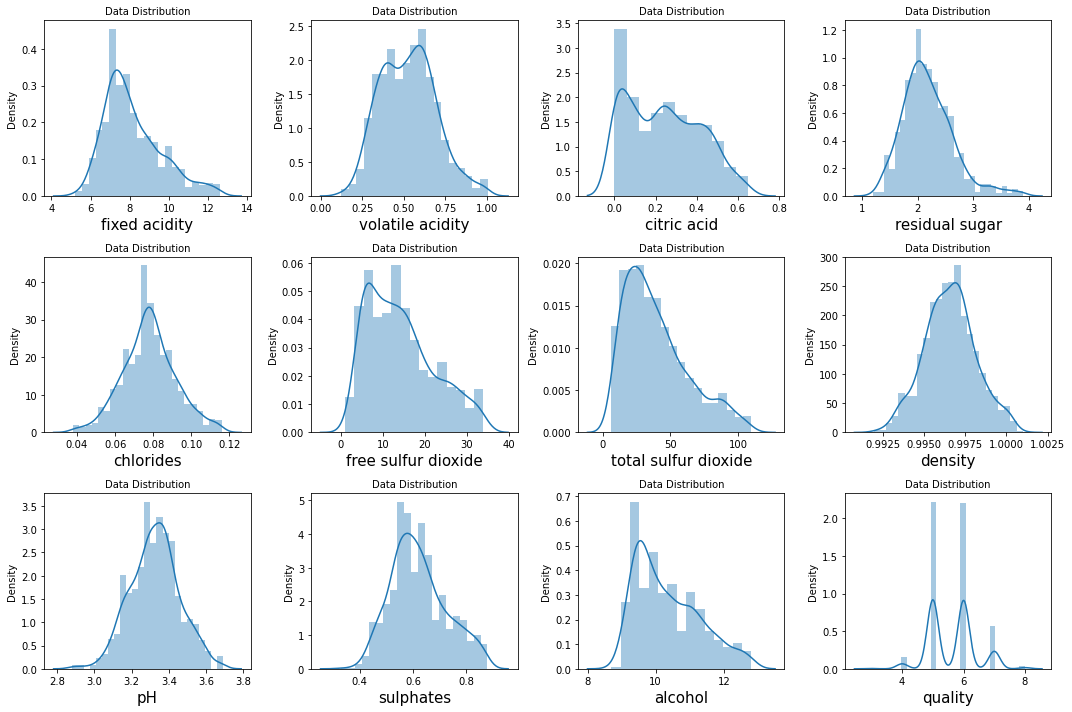

In [21]:
plt.figure(figsize = [15,10])
plotnumber = 1

for column in new_data:
    if plotnumber<=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(new_data[column])
        plt.xlabel(column, fontsize = 15)
        plt.title("Data Distribution", fontsize = 10)
    plotnumber += 1
plt.tight_layout()

In [22]:
#Now finding the correlation between features

In [23]:
corr_mat = new_data.corr()
corr_mat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.260522,0.648800,0.163487,0.142230,-0.156322,-0.077214,0.592353,-0.703313,0.179274,-0.013448,0.108935
volatile acidity,-0.260522,1.000000,-0.633711,0.066083,0.134667,0.001347,0.101788,0.073599,0.231213,-0.345744,-0.242693,-0.375587
citric acid,0.648800,-0.633711,1.000000,0.088561,0.026761,-0.088501,-0.013347,0.268401,-0.479099,0.295357,0.175732,0.234801
residual sugar,0.163487,0.066083,0.088561,1.000000,0.261065,0.136024,0.203036,0.351301,-0.023521,0.011430,0.097685,-0.004670
chlorides,0.142230,0.134667,0.026761,0.261065,1.000000,0.052100,0.219301,0.395155,-0.129992,-0.125596,-0.289147,-0.192799
free sulfur dioxide,-0.156322,0.001347,-0.088501,0.136024,0.052100,1.000000,0.648876,-0.016403,0.154995,0.083033,-0.018407,0.011494
total sulfur dioxide,-0.077214,0.101788,-0.013347,0.203036,0.219301,0.648876,1.000000,0.181100,0.041289,-0.080722,-0.261030,-0.179204
density,0.592353,0.073599,0.268401,0.351301,0.395155,-0.016403,0.181100,1.000000,-0.225117,0.068644,-0.533032,-0.235842
pH,-0.703313,0.231213,-0.479099,-0.023521,-0.129992,0.154995,0.041289,-0.225117,1.000000,-0.005574,0.096556,-0.090950
sulphates,0.179274,-0.345744,0.295357,0.011430,-0.125596,0.083033,-0.080722,0.068644,-0.005574,1.000000,0.281874,0.428214


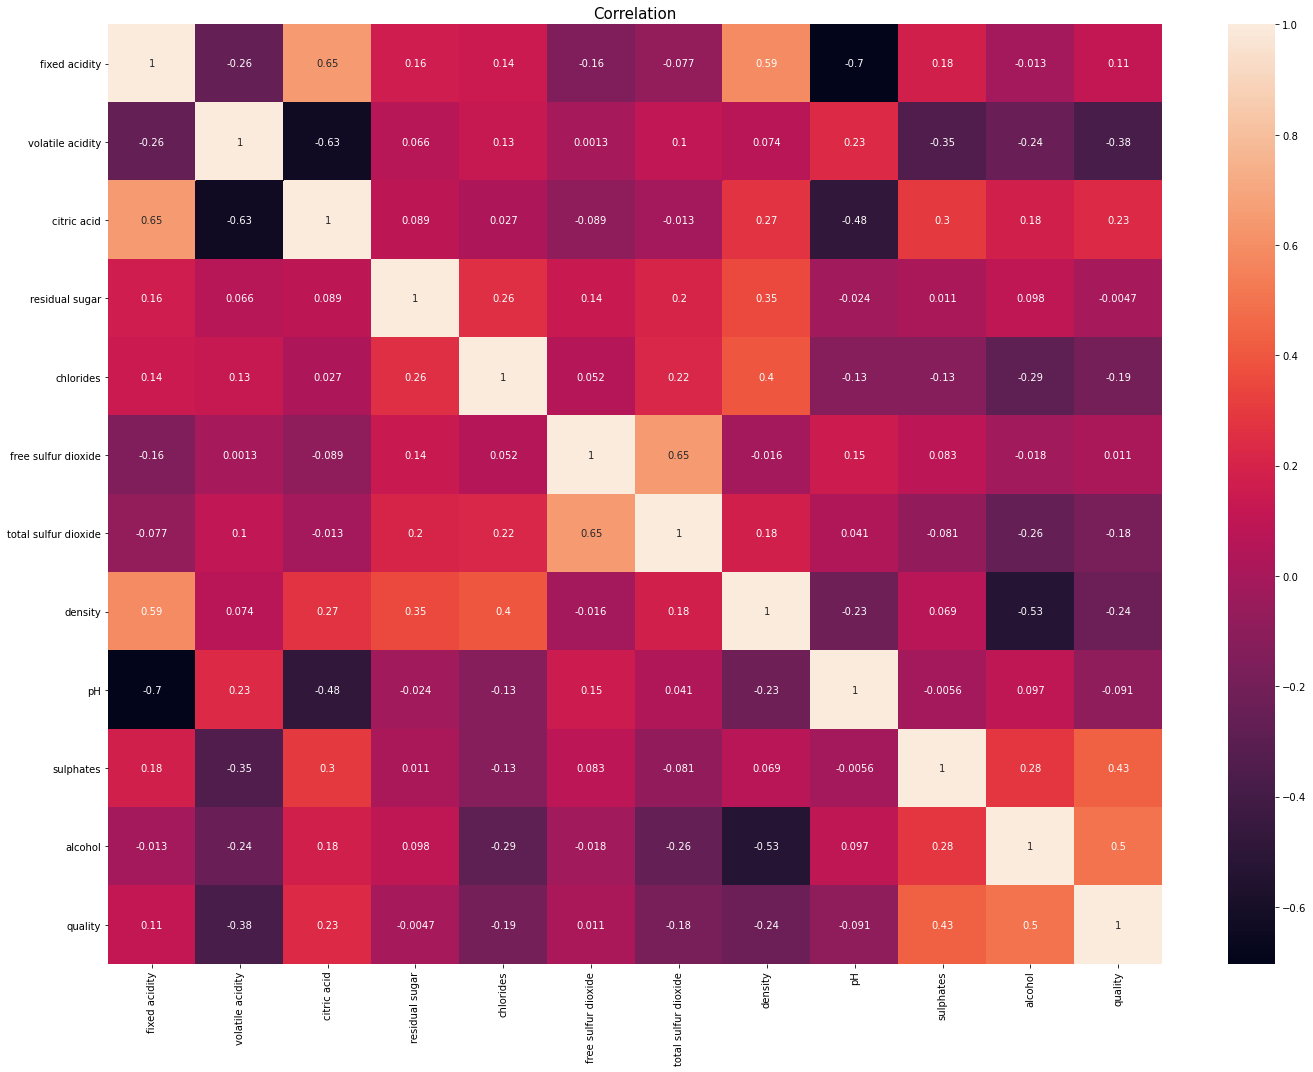

In [24]:
plt.figure(figsize = [20,15])
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation', fontsize=15)
plt.tight_layout()

In [25]:
corr_mat = new_data.corr()
corr_mat['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.498839
sulphates               0.428214
citric acid             0.234801
fixed acidity           0.108935
free sulfur dioxide     0.011494
residual sugar         -0.004670
pH                     -0.090950
total sulfur dioxide   -0.179204
chlorides              -0.192799
density                -0.235842
volatile acidity       -0.375587
Name: quality, dtype: float64

In [26]:
#Changing the quality data into two categories of good which will be donated with 1 and not good denoted with 0

new_data['goodquality'] = [1 if x >= 7 else 0 for x in new_data['quality']]

In [27]:
new_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [28]:
new_data.drop('quality', axis = 1, inplace=True)

In [29]:
new_data.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,goodquality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0


In [30]:
new_data['goodquality'].value_counts()

0    972
1    127
Name: goodquality, dtype: int64

In [31]:
new_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,goodquality
count,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000
mean,8.148863,0.525291,0.242639,2.184531,0.078082,14.239308,39.684258,0.996565,3.325223,0.621056,10.347574,0.115560
std,1.462938,0.166350,0.177680,0.460094,0.013971,7.983023,23.666463,0.001573,0.132481,0.105030,0.948971,0.319842
min,5.200000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991910,2.880000,0.330000,8.700000,0.000000
25%,7.100000,0.390000,0.080000,1.900000,0.069000,7.000000,21.000000,0.995515,3.240000,0.550000,9.500000,0.000000
50%,7.800000,0.520000,0.240000,2.100000,0.078000,13.000000,34.000000,0.996600,3.330000,0.610000,10.100000,0.000000
75%,9.000000,0.640000,0.390000,2.400000,0.086000,19.000000,53.000000,0.997500,3.410000,0.690000,11.000000,0.000000
max,12.600000,1.005000,0.650000,3.900000,0.116000,34.000000,110.000000,1.001000,3.690000,0.880000,12.800000,1.000000


In [32]:
#Scaling the data

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [35]:
#Separating label and features

x = new_data.drop(['goodquality'], axis = 1)
y = new_data['goodquality']

In [36]:
x_scaled = scaler.fit_transform(x)

In [37]:
#Splitting the data into train and test

In [38]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.75)

In [39]:
# Since there is some imbalance in the goodquality we will balance it first.

In [40]:
from sklearn.utils import resample

In [41]:
#Concetenating the training data

X = pd.concat([x_train,y_train], axis =1)

In [42]:
not_good = X[X.goodquality == 0]
good = X[X.goodquality ==1]

In [43]:
not_good.shape

(724, 12)

In [44]:
good.shape

(100, 12)

In [45]:
#Upsampling good

upscale = resample(good, replace =True, n_samples = len(not_good), random_state = 25)

In [46]:
#Combining the upscaled data with the majority

upsampled = pd.concat([not_good, upscale])

In [47]:
upsampled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,goodquality
1427,7.6,0.41,0.33,2.5,0.078,6.0,23.0,0.99570,3.30,0.58,11.2,0
707,7.4,0.49,0.19,3.0,0.077,16.0,37.0,0.99660,3.37,0.51,10.5,0
1350,9.0,0.60,0.29,2.0,0.069,32.0,73.0,0.99654,3.34,0.57,10.0,0
41,8.8,0.61,0.30,2.8,0.088,17.0,46.0,0.99760,3.26,0.51,9.3,0
961,7.1,0.56,0.14,1.6,0.078,7.0,18.0,0.99592,3.27,0.62,9.3,0


In [48]:
#Separating label and features

x = upsampled.drop(['goodquality'], axis = 1)
y = upsampled['goodquality']

In [49]:
x_scaled = scaler.fit_transform(x)

In [50]:
y.value_counts()

1    724
0    724
Name: goodquality, dtype: int64

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.25, random_state = 300)

In [52]:
#Model Building

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
LR = LogisticRegression()

In [55]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report

In [56]:
LR.fit(x_train,y_train)

LogisticRegression()

In [57]:
y_pred = LR.predict(x_test)

In [58]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8397790055248618

In [59]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[147,  32],
       [ 26, 157]], dtype=int64)

In [60]:
#AUC SCORE
roc_auc_score(y_test,y_pred)

0.8395762737735445

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       179
           1       0.83      0.86      0.84       183

    accuracy                           0.84       362
   macro avg       0.84      0.84      0.84       362
weighted avg       0.84      0.84      0.84       362



In [62]:
## Lets see which model will give the best output

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

In [64]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
kn = KNeighborsClassifier()

In [65]:
#training with the all of them

lr.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
kn.fit(x_train,y_train)

print("All Models Trained")

All Models Trained


In [66]:
lr.score(x_test,y_test)
dt.score(x_test,y_test)
rf.score(x_test,y_test)
kn.score(x_test,y_test)

print("All scores Captured")

All scores Captured


In [67]:
#Lets check the roc_auc_score
#for Logistic Regression
roc_auc_score(y_test,lr.predict(x_test))

0.8395762737735445

In [68]:
#for Decision Tree
roc_auc_score(y_test,dt.predict(x_test))

0.9608938547486033

In [69]:
#for Random Forest
roc_auc_score(y_test,rf.predict(x_test))

0.9860335195530726

In [70]:
#for KNeighborsClassifier
roc_auc_score(y_test,kn.predict(x_test))

0.894037915560033

In [71]:
#Now plotting roc_auc_curve for all the columns

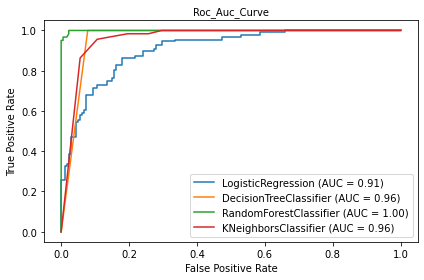

In [72]:
curve = plot_roc_curve(lr,x_test,y_test)

plot_roc_curve(dt,x_test,y_test,ax=curve.ax_)

plot_roc_curve(rf,x_test,y_test,ax=curve.ax_)

plot_roc_curve(kn,x_test,y_test,ax=curve.ax_)

plt.title('Roc_Auc_Curve', fontsize = 10)
plt.tight_layout()

## With above plotting we can see that Random Forest will work best for this dataset.

In [73]:
RFC = RandomForestClassifier(criterion='entropy',n_estimators=100, random_state=40)

In [74]:
RFC.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=40)

In [75]:
y_pred =RFC.predict(x_test)

In [76]:
accuracy = accuracy_score(y_test,y_pred)
conf_mat = confusion_matrix(y_test,y_pred)
roc = roc_auc_score(y_test,y_pred)
cr =classification_report(y_test,y_pred)

In [77]:
print("\nAccuracy Score ===>", accuracy)
print("\nConfusion Matrix===>\n",conf_mat)
print("\nROC_AUC_SCORE==>",roc)


Accuracy Score ===> 0.9861878453038674

Confusion Matrix===>
 [[174   5]
 [  0 183]]

ROC_AUC_SCORE==> 0.9860335195530726


In [78]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       179
           1       0.97      1.00      0.99       183

    accuracy                           0.99       362
   macro avg       0.99      0.99      0.99       362
weighted avg       0.99      0.99      0.99       362



In [79]:
# Hyperparameter tuning

In [81]:
from sklearn.model_selection import GridSearchCV

In [115]:
params = {'n_estimators':[100,120,150],
         'criterion':['gini','entropy'],
         'max_depth':[18,21,23],
         'min_samples_leaf': [3,4,2],
         'min_samples_split': [8,11,13]}

In [116]:
clf = RandomForestClassifier()

In [117]:
grid = GridSearchCV(clf, param_grid= params, cv= 9, n_jobs=-1)

In [118]:
grid.fit(x_train,y_train)

GridSearchCV(cv=9, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [18, 21, 23],
                         'min_samples_leaf': [3, 4, 2],
                         'min_samples_split': [8, 11, 13],
                         'n_estimators': [100, 120, 150]})

In [119]:
print('Best Estimators == > \n', grid.best_params_)

Best Estimators == > 
 {'criterion': 'gini', 'max_depth': 18, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 150}


In [120]:
#Reinstantiating classifier with the best parameters

clf = grid.best_estimator_

In [121]:
clf

RandomForestClassifier(max_depth=18, min_samples_leaf=2, min_samples_split=8,
                       n_estimators=150)

In [122]:
#Training the model with above estimators

clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=18, min_samples_leaf=2, min_samples_split=8,
                       n_estimators=150)

In [123]:
y_pred = clf.predict(x_test)

In [124]:
accuracy = accuracy_score(y_test,y_pred)
conf_mat = confusion_matrix(y_test,y_pred)
roc = roc_auc_score(y_test,y_pred)
cr =classification_report(y_test,y_pred)

In [125]:
print("\nAccuracy Score ===>", accuracy)
print("\nConfusion Matrix===>\n",conf_mat)
print("\nROC_AUC_SCORE==>",roc)


Accuracy Score ===> 0.9613259668508287

Confusion Matrix===>
 [[171   8]
 [  6 177]]

ROC_AUC_SCORE==> 0.9612601886619655


In [126]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       179
           1       0.96      0.97      0.96       183

    accuracy                           0.96       362
   macro avg       0.96      0.96      0.96       362
weighted avg       0.96      0.96      0.96       362



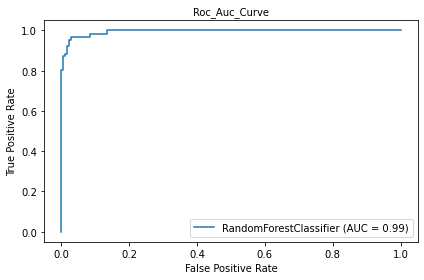

In [127]:
plot_roc_curve(clf,x_test,y_test)
plt.title('Roc_Auc_Curve', fontsize = 10)
plt.tight_layout()